# Support Vector Machines

In this section of the assignment, you will get to implement Support Vector Machines which are among the best (and many believe are indeed the best)“off-the-shelf” supervised learning algorithm.

This section is further divided into 3 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the next subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [ ]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [ ]:
# Feel free to use this helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

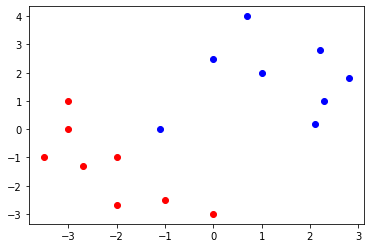

In [ ]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])
plot_points(X, y)
plt.show()

In the next cell you are required to derive the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles. Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

In [ ]:
def solve_hard_margin_svm(X,y):
    constraints=[]
    w = cp.Variable(2)
    b = cp.Variable()
    no_of_samples=y.shape[0]
    for i in range(no_of_samples):
        constraints.append(y[i]*(w.T @ X[i]+b) >=1)


    prob = cp.Problem(cp.Minimize((1/2)*(cp.norm(w)**2)),
                    constraints)
    res = prob.solve()
    
    w=w.value
    b=b.value
    return w ,b

w,b = solve_hard_margin_svm(X,y)
print("Value of w")
print(w)
print("Value of b")
print(b)

Value of w
[-1.73913043 -1.30434783]
Value of b
-2.9130434780347696


*italicized text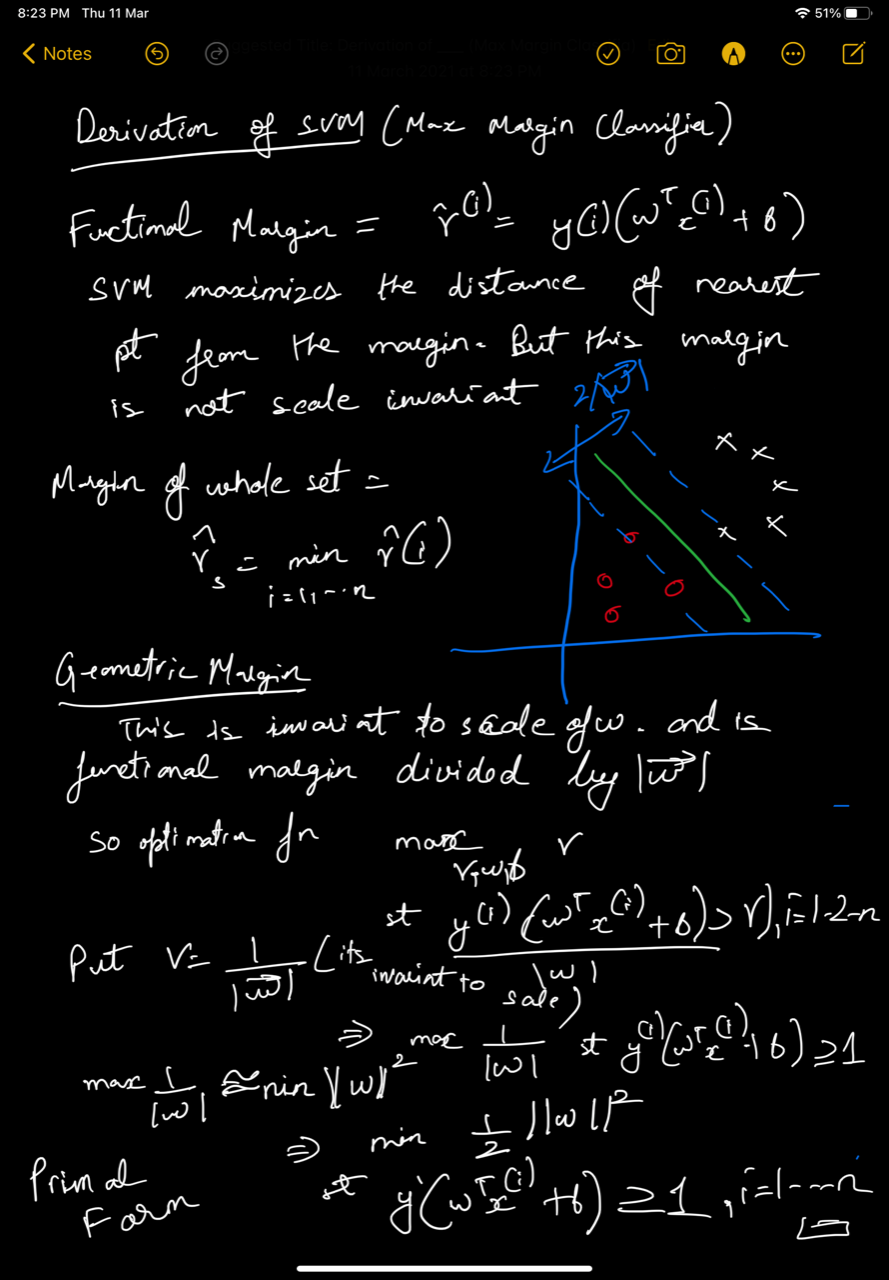*

In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines

You may want to create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

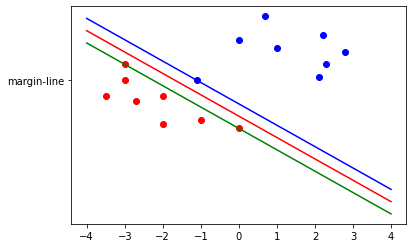

In [ ]:
def plotLines(w,b):
    w0=w[0]
    w1=w[1]
    x_cord = np.linspace(-4,4,100)
    y_cord = (-b-w0*x_cord)/w1
    y_cord1 = (-b+1-w0*x_cord)/w1
    y_cord2 = (-b-1-w0*x_cord)/w1
    plt.plot(x_cord, y_cord, '-r','margin-line')
    plt.plot(x_cord, y_cord1, '-g','margin-line')
    plt.plot(x_cord, y_cord2, '-b','margin-line')

plotLines(w, b)
plot_points(X, y)


In the next cell please plot only the support vectors along with the boundary, w vector, and margins. 

**Note: You are not supposed to hard-code the points here**

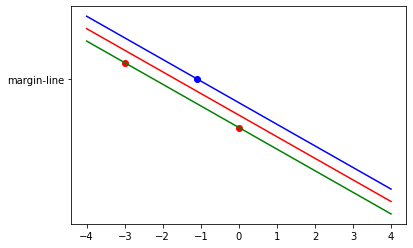

In [ ]:
support_vectors=[]
support_vectors_index=[]
y_support_vectors=[]
ep=0.01
for i,item in enumerate(X):
  temp= np.dot(w,item)
  # print(temp+b , temp-b)
  if abs(temp+b-1)<ep or abs(temp+b+1)<ep:
    support_vectors.append(item)
    support_vectors_index.append(i)
    y_support_vectors.append(y[i])
support_vectors=np.array(support_vectors)
y_support_vectors=np.array(y_support_vectors)
plotLines(w, b)
plot_points(support_vectors,y_support_vectors)


In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Explain your observations theoretically.

[[ -3.5  -1. ]
 [ -3.    0. ]
 [ -3.    1. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [  0.   -3. ]
 [ -1.1   0. ]
 [  0.    2.5]
 [  1.    2. ]
 [  0.7   4. ]
 [  2.1   0.2]
 [  2.3   1. ]
 [  2.8   1.8]
 [  2.2   2.8]
 [ -4.  -10. ]
 [  4.    4. ]]


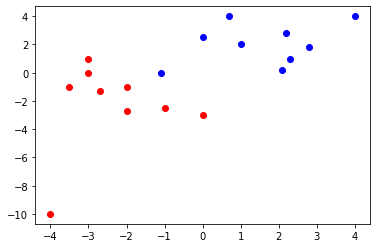

In [ ]:
# Re-create the Synthetic Data by adding the points and visualize the points
addded_row = np.array([-4,-10])
 
# Adding column to numpy array
X_modified = np.vstack((X,  np.array([-4,-10])))
X_modified = np.vstack((X_modified, np.array([4,4]) ))
y_modified = np.append(y,1)
y_modified = np.append(y_modified,-1)
print(X_modified)
plot_points(X_modified,y_modified)
# Decision boundary remains same . as the points that are added are well off the support vectors and from the margin


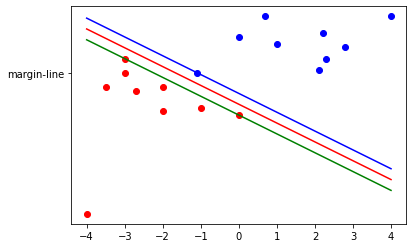

In [ ]:
# Solve for the decision boundary using this modified dataset

w,b = solve_hard_margin_svm(X_modified,y_modified)
plotLines(w, b)
plot_points(X_modified, y_modified)

In [ ]:
def solve_soft_margin_svm(X,y,c):
    constraints=[]
    w = cp.Variable(2)

    b = cp.Variable()
    no_of_samples=y.shape[0]
    eps= cp.Variable(no_of_samples)
    for i in range(no_of_samples):
        constraints.append(y[i]*(w.T @ X[i]+b) >=1-eps[i])

    
    prob = cp.Problem(cp.Minimize(((1/2)*(cp.norm(w)**2 ))+ c*cp.norm(eps,1)),
                    constraints)
    res = prob.solve()
    
    w=w.value
    b=b.value
    return w ,b,eps


w,b,eps = solve_soft_margin_svm(X_modified,y_modified,0.01)
print(w)
print(b)


[-0.22506806 -0.19858946]
0.013672328924381376


In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

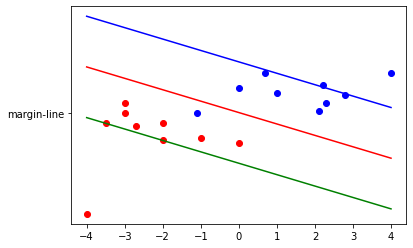

In [ ]:
# Write your code here for C= 0.01
w_soft,b_soft,eps = solve_soft_margin_svm(X_modified,y_modified,0.01)
plotLines(w_soft, b_soft)
plot_points(X_modified,y_modified)

# for diiferent value of c decision bounday change. 
# for c=0.1 , algorithm choses large error(misclassification)
# as c is increased, the  algoritms is forced to reducde cp.norm(eps,1) term, so tight margins are formed



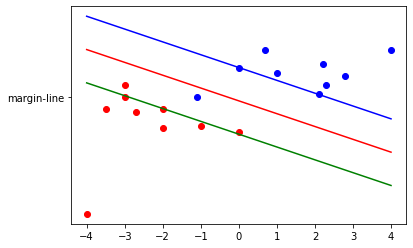

In [ ]:
# Write your code here for C= 0.1
w_soft,b_soft,eps = solve_soft_margin_svm(X_modified,y_modified,0.1)
plotLines(w_soft, b_soft)
plot_points(X_modified,y_modified)

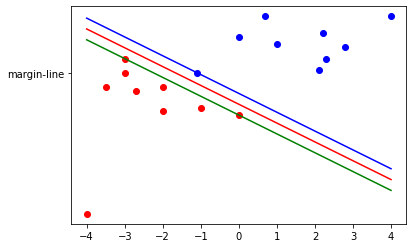

In [ ]:
# Write your code here for C= 3
w_soft,b_soft,eps = solve_soft_margin_svm(X_modified,y_modified,3)
plotLines(w_soft, b_soft)
plot_points(X_modified,y_modified)

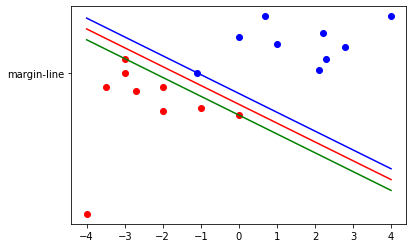

In [ ]:
# Write your code here for C= 10
w_soft,b_soft,eps = solve_soft_margin_svm(X_modified,y_modified,10)
plotLines(w_soft, b_soft)
plot_points(X_modified,y_modified)

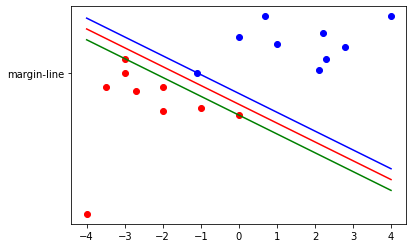

In [ ]:
# Write your code here for C= 100
w_soft,b_soft,eps = solve_soft_margin_svm(X_modified,y_modified,100)
plotLines(w_soft, b_soft)
plot_points(X_modified,y_modified)

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion?
Explain why? Show your results by appropriate plots?

[2, 7, 8]
[-0.37735849 -0.37735849]


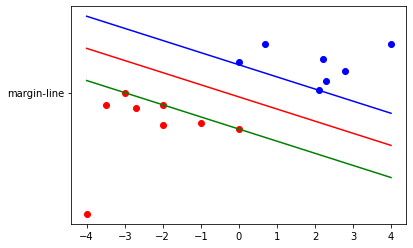

In [ ]:
# Write your Code here
print(support_vectors_index)
x_removed= np.copy(X_modified)
y_removed= np.copy(y_modified)
for i in support_vectors_index:
    x_removed=np.delete(x_removed,i,axis=0)
    y_removed=np.delete(y_removed,i)

w_soft,b_soft,eps = solve_soft_margin_svm(x_removed,y_removed,100)
print(w_soft)
plotLines(w_soft, b_soft)
plot_points(x_removed,y_removed)

# // Yes the boundary change after deletion. as svm uses support vectors(points nearest to margin) to plot the two support hyperplanes. 
# If the support vectors themselves are removed,  margin changes and farther support vectors are used from the former ones.

### Subsection 2

In [ ]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2021-03-09 08:32:44--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  56.6MB/s    in 0.2s    

2021-03-09 08:32:44 (56.6 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-03-09 08:32:45--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-labels

In [ ]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [ ]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [ ]:
Taking  subset of samples whose output is 0 ,1  and 2
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)
indices= np.where((labels_test==0 )| (labels_test==1 ) | (labels_test==2 ))
images_test= images_test[indices]
labels_test = labels_test[indices]


(10000, 784)
(10000,)


In [ ]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... C=0.01, kernel=linear, score=0.981, total=  15.6s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s remaining:    0.0s


[CV] ............... C=0.01, kernel=linear, score=0.978, total=  15.1s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   30.7s remaining:    0.0s


[CV] ............... C=0.01, kernel=linear, score=0.981, total=  14.4s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.983, total=  16.3s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.982, total=  16.5s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.981, total=  15.8s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.978, total=  15.4s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.981, total=  14.8s
[CV] C=0.1, kernel=linear ............................................
[CV] ................ C=0.1, kernel=linear, score=0.983, total=  16.4s
[CV] C=0.1, kernel=linear ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  7.8min finished


0.9809342230695901
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       996
           1       0.99      0.98      0.99      1146
           2       0.96      0.98      0.97      1005

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0.98      3147

--------------------------------------------------


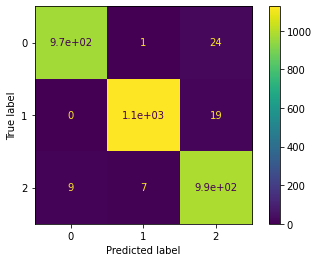

In [ ]:
# //linear kernel
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
  

param_grid = [
  {'C': [0.01,0.1,1, 10, 100, 1000], 'kernel': ['linear']}
 ]
# # Create a svm Classifier
# c_values=[0.1, 1 ,10]
# gamma_values=[0.01, 0.1, 1 ,10]
clf = GridSearchCV(
        SVC(), param_grid, refit = True, verbose = 3
    )
clf.fit(images_train, labels_train)
# clf = svm.SVC(kernel='linear',C=0.1) # Rbf kernel
# clf.fit(images_train, labels_train)
y_pred = clf.predict(images_test)


# print("Results for C = " ,c , "and gamma = ", g)
print(accuracy_score(y_pred,labels_test))
print(classification_report(y_pred, labels_test))
cm=confusion_matrix(y_pred, labels_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=clf.classes_)
disp.plot()
print("--------------------------------------------------") 

The best values of  c = 0.1
{'C': 0.01, 'kernel': 'linear'}
--------------------------------------------------
0.9809342230695901
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       996
           1       0.99      0.98      0.99      1146
           2       0.96      0.98      0.97      1005

    accuracy                           0.98      3147
   macro avg       0.98      0.98      0.98      3147
weighted avg       0.98      0.98      0.98      3147

--------------------------------------------------


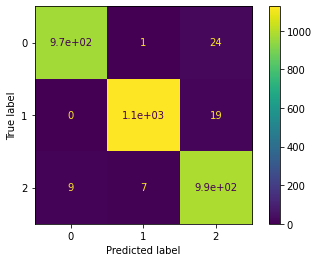

In [ ]:
print("The best values of  c = 0.1" ) 
print(clf.best_params_)
print("--------------------------------------------------") 
print(accuracy_score(y_pred,labels_test))
print(classification_report(y_pred, labels_test))
cm=confusion_matrix(y_pred, labels_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=clf.classes_)
disp.plot()
print("--------------------------------------------------") 


In [ ]:
# //Polynomial kernel
param_grid = [
  {'C': [0.01,0.1,1, 10, 100, 1000], 'kernel': ['poly']}
 ]
# # Create a svm Classifier
# c_values=[0.1, 1 ,10]
# gamma_values=[0.01, 0.1, 1 ,10]
clf = GridSearchCV(
        SVC(), param_grid, refit = True, verbose = 3
    )
clf.fit(images_train, labels_train)
# clf = svm.SVC(kernel='linear',C=0.1) # Rbf kernel
# clf.fit(images_train, labels_train)
y_pred = clf.predict(images_test)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=0.01, kernel=poly .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. C=0.01, kernel=poly, score=0.935, total= 2.4min
[CV] C=0.01, kernel=poly .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[CV] ................. C=0.01, kernel=poly, score=0.939, total= 2.5min
[CV] C=0.01, kernel=poly .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.0s


[CV] ................. C=0.01, kernel=poly, score=0.940, total= 2.5min
[CV] C=0.01, kernel=poly .............................................
[CV] ................. C=0.01, kernel=poly, score=0.939, total= 2.5min
[CV] C=0.01, kernel=poly .............................................
[CV] ................. C=0.01, kernel=poly, score=0.949, total= 2.5min
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.979, total=  56.7s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.984, total=  57.1s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.980, total=  57.0s
[CV] C=0.1, kernel=poly ..............................................
[CV] .................. C=0.1, kernel=poly, score=0.982, total=  57.3s
[CV] C=0.1, kernel=poly ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 23.2min finished


The best values of  c = 0.1
{'C': 10, 'kernel': 'poly'}
--------------------------------------------------
0.9939625039720369
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       984
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1028

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147

--------------------------------------------------


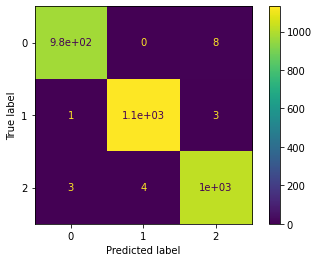

In [ ]:
print("The best values of  c = 10" ) 
print(clf.best_params_)
print("--------------------------------------------------") 
print(accuracy_score(y_pred,labels_test))
print(classification_report(y_pred, labels_test))
cm=confusion_matrix(y_pred, labels_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=clf.classes_)
disp.plot()
print("--------------------------------------------------") 

In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# # Create a svm Classifier. this was done on the original dataset without gamma.
# c_values=[0.1, 1 ,10]
# gamma_values=[0.01, 0.1, 1 ]
clf =        SVC(kernel='rbf',C=10)
clf.fit(images_train, labels_train)
# clf = svm.SVC(kernel='linear',C=0.1) # Rbf kernel
# clf.fit(images_train, labels_train)
y_pred = clf.predict(images_test)

The best values of  c = 0.1
{'C': 10, 'kernel': 'poly'}
--------------------------------------------------
0.9939625039720369
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       984
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1028

    accuracy                           0.99      3147
   macro avg       0.99      0.99      0.99      3147
weighted avg       0.99      0.99      0.99      3147

--------------------------------------------------


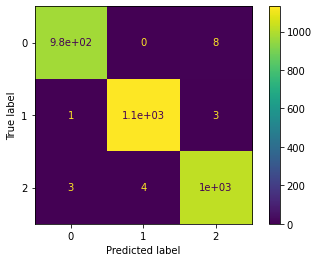

In [ ]:

from sklearn.metrics import classification_report
print(classification_report(y_pred, labels_test))

cm=confusion_matrix(y_pred, labels_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,-1])
disp.plot() 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       989
           1       0.99      0.99      0.99      1137
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.98      1015
           4       0.98      0.98      0.98       983
           5       0.98      0.98      0.98       890
           6       0.99      0.99      0.99       956
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       967
           9       0.97      0.98      0.97      1003

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



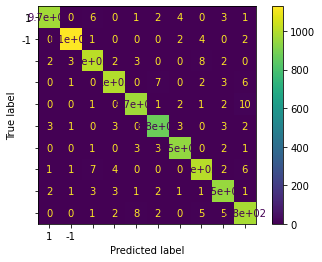

In [ ]:
clf.prefict_
from sklearn.metrics import classification_report
target_names = ['class 1', 'class -1']
print(classification_report(y_pred, labels_test))

cm=confusion_matrix(y_pred, labels_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[1,-1])
disp.plot() 

In [ ]:
All models are taking very long time to train. used grid search to search for the best paramteres

for linear and ponymoial kernel grid search is working
for rbf its taking extremely long time if gamma is varied
accuracy for linear kernel =0.9809342230695901
accuracy for polynomial kernel= 0.9939625039720369
accuracy for rbf kernel =0.98(without gamma provided in original dataset)